# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV506"

In [47]:
LV_AXIS_THRESHOLD = 1.5  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP060416, SRP033135, SRP058773, SRP018853, SRP002326, SRP012461, SRP012546, SRP042161, SRP055153, SRP066834, SRP036821, SRP057196, SRP007596, SRP050499, SRP006575, SRP028902, SRP057205, SRP060708, SRP009862, SRP007947, SRP036769, SRP049097, SRP019994, SRP059379, SRP032833, SRP058667, SRP061566, SRP041387, SRP023262, SRP051102, SRP050365, SRP058300, SRP019936, SRP064464, SRP023111, SRP014320, SRP033119, SRP041094, SRP031507, SRP059950, SRP006717, SRP013724, SRP064259, SRP012557, SRP009276, SRP055810, SRP024274, SRP026315, SRP010350, SRP007461, SRP009266, SRP064323, SRP051822, SRP044042, SRP017575, SRP022920, SRP009247, SRP062230, SRP042249, SRP034953, SRP015013, SRP025982, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (58 != 63)
  warnings.warn(


In [18]:
lv_data.shape

(7638, 106)

In [19]:
lv_data.head()

cell type tonsil donor  \
project   run                                                         
SRP055569 SRR1821717  MCF10a human breast cancer cells          NaN   
          SRR1821716  MCF10a human breast cancer cells          NaN   
          SRR1821715  MCF10a human breast cancer cells          NaN   
          SRR1821714  MCF10a human breast cancer cells          NaN   
          SRR1821713  MCF10a human breast cancer cells          NaN   

                     facs gating hour post serum-switch debris control well  \
project   run                                                                 
SRP055569 SRR1821717         NaN                    NaN    NaN          NaN   
          SRR1821716         NaN                    NaN    NaN          NaN   
          SRR1821715         NaN                    NaN    NaN          NaN   
          SRR1821714         NaN                    NaN    NaN          NaN   
          SRR1821713         NaN                    NaN    NaN          NaN   

                     cells in well library protocol well number  \
project   run                                                     
SRP055569 SRR1821717           NaN              NaN         NaN   
          SRR1821716           NaN              NaN         NaN   
          SRR1821715           NaN              NaN         NaN   
          SRR1821714           NaN              NaN         NaN   
          SRR1821713           NaN              NaN         NaN   

                     reprogramming time point (day)  ... cell state  \
project   run                                        ...              
SRP055569 SRR1821717                            NaN  ...        NaN   
          SRR1821716                            NaN  ...        NaN   
          SRR1821715                            NaN  ...        NaN   
          SRR1821714                            NaN  ...        NaN   
          SRR1821713                            NaN  ...        NaN   

                     culture conditions  \
project   run                             
SRP055569 SRR1821717                NaN   
          SRR1821716                NaN   
          SRR1821715                NaN   
          SRR1821714                NaN   
          SRR1821713                NaN   

                     dilutions of the malignant b-cell line seqc sample  \
project   run                                                             
SRP055569 SRR1821717                                    NaN         NaN   
          SRR1821716                                    NaN         NaN   
          SRR1821715                                    NaN         NaN   
          SRR1821714                                    NaN         NaN   
          SRR1821713                                    NaN         NaN   

                     platform site library id lane flowcell     LV506  
project   run                                                          
SRP055569 SRR1821717      NaN  NaN        NaN  NaN      NaN -0.045383  
          SRR1821716      NaN  NaN        NaN  NaN      NaN -0.029284  
          SRR1821715      NaN  NaN        NaN  NaN      NaN  0.026655  
          SRR1821714      NaN  NaN        NaN  NaN      NaN -0.075816  
          SRR1821713      NaN  NaN        NaN  NaN      NaN -0.090069  

[5 rows x 106 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

cell type                         0.017870
well number                       0.006987
reprogramming time point (day)    0.006987
strategy                          0.005905
diagnosis                         0.004405
transfection                      0.004095
time                              0.004089
tag                               0.004000
group                             0.003960
antibody lot #                    0.003833
antibody cat. #                   0.003833
antibody vendor                   0.003833
facs gating                       0.003469
tonsil donor                      0.003469
tumor group                       0.003105
antibody for pull-down            0.003082
bar code                          0.003082
reprogramming vector              0.003027
iPSc                              0.003027
tissue subtype                    0.002612
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type         0.017870
tissue subtype    0.002612
tissue            0.001821
tissue type       0.000881
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP055569 SRR2019236  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019229  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821454  mixture of U87 human glioma cells and MCF10a h...   
SRP060416 SRR2088255                       tonsil Innate lymphoid cells   
SRP055569 SRR1821588  mixture of U87 human glioma cells and MCF10a h...   
SRP033135 SRR1033027             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR2019053                             U87 human glioma cells   
          SRR2019136  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821388                             U87 human glioma cells   
          SRR1821361                             U87 human glioma cells   
          SRR1821565  mixture of U87 human glioma cells and MCF10a h...   
SRP058773 SRR2042659                                                NaN   
SRP055569 SRR2019133  mixture of U87 human glioma cells and WI-38 hu...   
SRP018853 SRR765001                                                 NaN   
SRP002326 SRR040021                                                 NaN   
SRP055569 SRR1821550  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019224  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821384                             U87 human glioma cells   
SRP012461 SRR490466                                         Fibroblasts   
SRP055569 SRR1821364                             U87 human glioma cells   
SRP012546 SRR491345                                                 NaN   
SRP055569 SRR2019138  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019223  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821379                             U87 human glioma cells   
          SRR2019198  mixture of U87 human glioma cells and WI-38 hu...   

                                        tissue tissue subtype     LV506  
project   run                                                            
SRP055569 SRR2019236                       NaN            NaN  7.371552  
          SRR2019229                       NaN            NaN  1.187554  
          SRR1821454                       NaN            NaN  0.810151  
SRP060416 SRR2088255                       NaN            NaN  0.681417  
SRP055569 SRR1821588                       NaN            NaN  0.649546  
SRP033135 SRR1033027                       NaN            NaN  0.603215  
SRP055569 SRR2019053                       NaN            NaN  0.566979  
          SRR2019136                       NaN            NaN  0.489380  
          SRR1821388                       NaN            NaN  0.482684  
          SRR1821361                       NaN            NaN  0.480267  
          SRR1821565                       NaN            NaN  0.479272  
SRP058773 SRR2042659                       NaN            NaN  0.442532  
SRP055569 SRR2019133                       NaN            NaN  0.423257  
SRP018853 SRR765001                        NaN            NaN  0.414481  
SRP002326 SRR040021                      tumor            NaN  0.389917  
SRP055569 SRR1821550                       NaN            NaN  0.364456  
          SRR2019224                       NaN            NaN  0.348339  
          SRR1821384                       NaN            NaN  0.346569  
SRP012461 SRR490466                        NaN            NaN  0.343525  
SRP055569 SRR1821364                       NaN            NaN  0.326624  
SRP012546 SRR491345   non-tumoral renal cortex            NaN  0.320357  
SRP055569 SRR2019138                       NaN            NaN  0.309182  
          SRR2019223                       NaN            NaN  0.300788  
          SRR1821379                       NaN            NaN  0.294517  
          SRR2019198                       NaN            NaN  0.291520

In [25]:
# what is there in these projects?
lv_data.loc[["SRP058773"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

well number reprogramming time point (day)     LV506
project   run                                                            
SRP058773 SRR2042659          50                             10  0.442532
          SRR2042623          77                             10  0.215624
          SRR2042632          58                             10  0.128720
          SRR2042622          18                             10  0.125073
          SRR2042627          89                             10  0.081924
          SRR2042657          81                             10  0.076701
          SRR2042621          39                             10  0.063978
          SRR2042646          48                             10  0.062667
          SRR2042645          27                             10  0.062096
          SRR2042656          32                             10  0.045325

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [56]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [57]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [58]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [59]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP055569 SRR2019236  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019229  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821454  mixture of U87 human glioma cells and MCF10a h...   
SRP060416 SRR2088255                       tonsil Innate lymphoid cells   
SRP055569 SRR1821588  mixture of U87 human glioma cells and MCF10a h...   
SRP033135 SRR1033027             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR2019053                             U87 human glioma cells   
          SRR2019136  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821388                             U87 human glioma cells   
          SRR1821361                             U87 human glioma cells   
          SRR1821565  mixture of U87 human glioma cells and MCF10a h...   
SRP058773 SRR2042659                                    NOT CATEGORIZED   
SRP055569 SRR2019133  mixture of U87 human glioma cells and WI-38 hu...   
SRP018853 SRR765001                                     NOT CATEGORIZED   
SRP002326 SRR040021                                               tumor   
SRP055569 SRR1821550  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019224  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821384                             U87 human glioma cells   
SRP012461 SRR490466                                         Fibroblasts   
SRP055569 SRR1821364                             U87 human glioma cells   

                         LV506  
project   run                   
SRP055569 SRR2019236  7.371552  
          SRR2019229  1.187554  
          SRR1821454  0.810151  
SRP060416 SRR2088255  0.681417  
SRP055569 SRR1821588  0.649546  
SRP033135 SRR1033027  0.603215  
SRP055569 SRR2019053  0.566979  
          SRR2019136  0.489380  
          SRR1821388  0.482684  
          SRR1821361  0.480267  
          SRR1821565  0.479272  
SRP058773 SRR2042659  0.442532  
SRP055569 SRR2019133  0.423257  
SRP018853 SRR765001   0.414481  
SRP002326 SRR040021   0.389917  
SRP055569 SRR1821550  0.364456  
          SRR2019224  0.348339  
          SRR1821384  0.346569  
SRP012461 SRR490466   0.343525  
SRP055569 SRR1821364  0.326624

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [60]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [61]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [62]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [63]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [64]:
_srp_code = "SRP058773"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Fibroblasts",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [65]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [66]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [67]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [68]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [69]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [70]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [71]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [72]:
len(attr_order)

15

In [73]:
attr_order[:5]

['Glioma + WI-38 lung fibroblast cells',
 'Glioma + MCF10 breast cancer cells',
 'tonsil Innate lymphoid cells (ILC3)',
 'Human Skeletal Muscle Myoblasts (HSMM)',
 'U87 human glioma cells']

## Plot

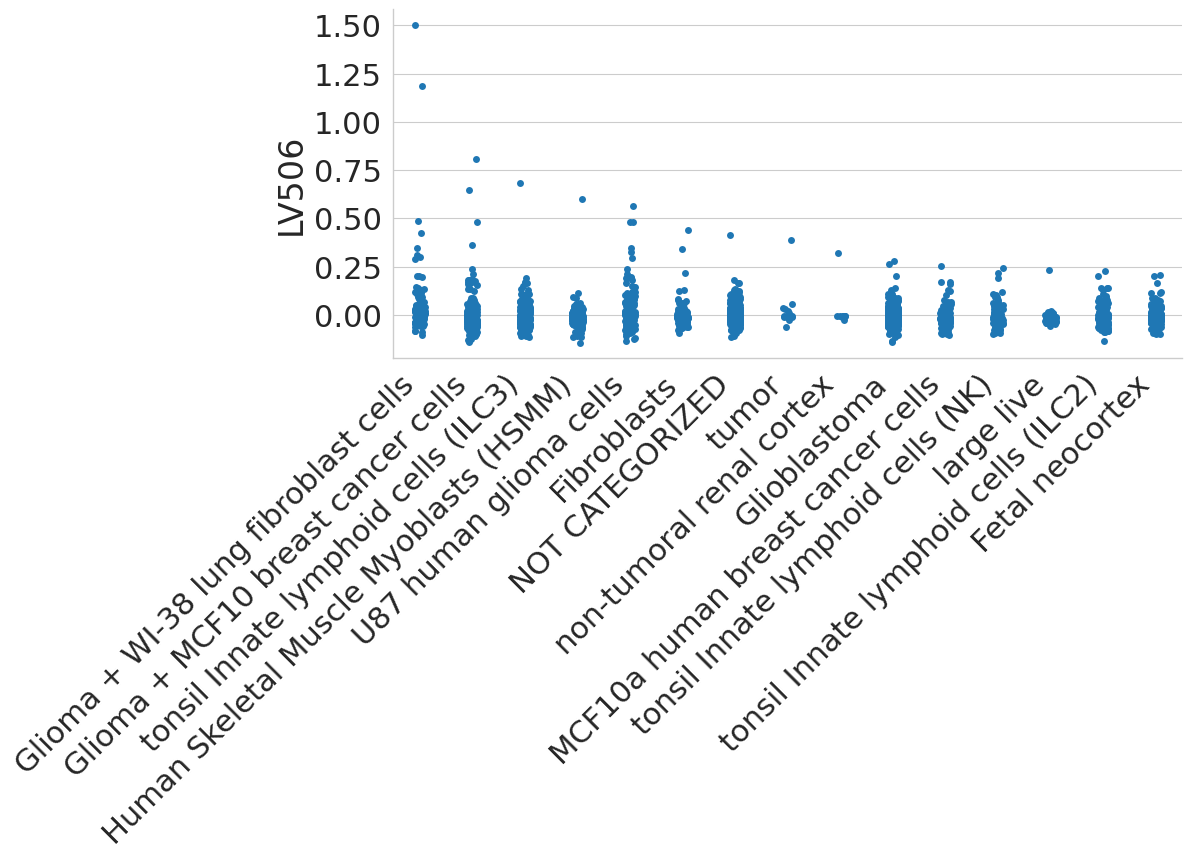

In [74]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [135]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [75]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("NOT CATE")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV506
project   run                                  
SRP018853 SRR765001   NOT CATEGORIZED  0.414481
SRP050499 SRR2013709  NOT CATEGORIZED  0.183074
SRP057205 SRR1975455  NOT CATEGORIZED  0.167382
          SRR1975456  NOT CATEGORIZED  0.167061
SRP050499 SRR2013508  NOT CATEGORIZED  0.136765
SRP032833 SRR1027993  NOT CATEGORIZED  0.129911
SRP050499 SRR2013759  NOT CATEGORIZED  0.127787
SRP058667 SRR2039200  NOT CATEGORIZED  0.123096
SRP050499 SRR2013549  NOT CATEGORIZED  0.119296
          SRR2013579  NOT CATEGORIZED  0.109999
SRP050365 SRR1685740  NOT CATEGORIZED  0.106980
SRP058300 SRR2018243  NOT CATEGORIZED  0.105630
SRP019936 SRR791065   NOT CATEGORIZED  0.105374
SRP050499 SRR2013679  NOT CATEGORIZED  0.103108
SRP023111 SRR867029   NOT CATEGORIZED  0.102651
SRP033119 SRR1032176  NOT CATEGORIZED  0.100977
SRP050499 SRR2013540  NOT CATEGORIZED  0.100701
SRP057205 SRR1975504  NOT CATEGORIZED  0.100409
          SRR1975503  NOT CATEGORIZED  0.099010
SRP033119 SRR1032175  NOT CATEGORIZED  0.096854

In [76]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP018853"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

status     barcode     LV506
project   run                                     
SRP018853 SRR765001  healthy  GTGCATCCTA  0.414481
          SRR765032  pre-T1D  AGCCTAAGCT  0.051977
          SRR765049  pre-T1D  GTGCATCCTA  0.017764
          SRR765004  healthy  TCAACGGTAG  0.007186
          SRR764996  healthy  AGCCTAAGCT  0.003553
          SRR765010  healthy  GTGCATCCTA  0.003058
          SRR765018  pre-T1D  TCAACGGTAG  0.000489
          SRR765027  pre-T1D  CATTGTTAGC -0.001425
          SRR765028  pre-T1D  GTGCATCCTA -0.001437
          SRR765026  pre-T1D  CATTGTTAGC -0.001788
          SRR765039  pre-T1D  CATTGTTAGC -0.002113
          SRR764984  healthy  TCAACGGTAG -0.002490
          SRR765017  pre-T1D  AGCCTAAGCT -0.002607
          SRR765047  pre-T1D  CATTGTTAGC -0.002977
          SRR764988  healthy  TCAACGGTAG -0.003176
          SRR764985  healthy  CATTGTTAGC -0.003523
          SRR765022  pre-T1D  TCAACGGTAG -0.004028
          SRR765056  pre-T1D  TCAACGGTAG -0.004090
          SRR765000  healthy  TCAACGGTAG -0.004158
          SRR765030  pre-T1D  CATTGTTAGC -0.004269
          SRR764994  healthy  CATTGTTAGC -0.004355
          SRR765043  pre-T1D  CATTGTTAGC -0.004434
          SRR765033  pre-T1D  TCAACGGTAG -0.004696
          SRR765021  pre-T1D  TCAACGGTAG -0.004813
          SRR765005  healthy  CATTGTTAGC -0.004818
          SRR765012  healthy  CATTGTTAGC -0.004969
          SRR765051  pre-T1D  TCAACGGTAG -0.004981
          SRR764989  healthy  CATTGTTAGC -0.005098
          SRR764991  healthy  CATTGTTAGC -0.005166
          SRR764981  healthy  CATTGTTAGC -0.005319
          SRR765015  healthy  TCAACGGTAG -0.005389
          SRR765016  healthy  CATTGTTAGC -0.005498
          SRR764999  healthy  CATTGTTAGC -0.005626
          SRR765009  healthy  CATTGTTAGC -0.005634
          SRR765053  pre-T1D  TCAACGGTAG -0.005694
          SRR765042  pre-T1D  CATTGTTAGC -0.005780
          SRR764998  healthy  AGCCTAAGCT -0.005858
          SRR765048  pre-T1D  CATTGTTAGC -0.006073
          SRR765020  pre-T1D  AGCCTAAGCT -0.006566
          SRR765040  pre-T1D  GTGCATCCTA -0.006728
          SRR765034  pre-T1D  TCAACGGTAG -0.006860
          SRR764983  healthy  AGCCTAAGCT -0.006946
          SRR765024  pre-T1D  CATTGTTAGC -0.007583
          SRR765045  pre-T1D  CATTGTTAGC -0.007618
          SRR765035  pre-T1D  AGCCTAAGCT -0.007693
          SRR765031  pre-T1D  TCAACGGTAG -0.007824
          SRR765052  pre-T1D  AGCCTAAGCT -0.008198
          SRR765023  pre-T1D  AGCCTAAGCT -0.008232
          SRR765055  pre-T1D  AGCCTAAGCT -0.008762
          SRR764990  healthy  AGCCTAAGCT -0.008789
          SRR764993  healthy  TCAACGGTAG -0.008929
          SRR764997  healthy  TCAACGGTAG -0.008952
          SRR765036  pre-T1D  AGCCTAAGCT -0.009183
          SRR765058  pre-T1D  AGCCTAAGCT -0.009442
          SRR765057  pre-T1D  TCAACGGTAG -0.009601
          SRR765054  pre-T1D  AGCCTAAGCT -0.009738
          SRR765014  healthy  AGCCTAAGCT -0.009748
          SRR765006  healthy  GTGCATCCTA -0.010198
          SRR765044  pre-T1D  GTGCATCCTA -0.010386
          SRR765013  healthy  GTGCATCCTA -0.011486

In [143]:
# _tmp["facs gating"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )